In [89]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
city_df= pd.DataFrame(city_data)
ride_data=pd.read_csv(ride_data_to_load)
ride_df=pd.DataFrame(ride_data)

# Combine the data into a single dataset
combined_data= city_df.merge(ride_df, on=["city"])

# Display the data table for preview
combined_data.head(20)


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

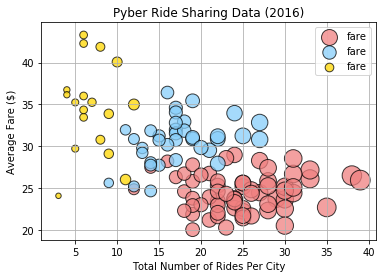

In [90]:
# Obtain the x and y coordinates for each of the three city types
#URBAN
#x-values
urban_values=combined_data.loc[combined_data['type']=="Urban"]
city_groups_urban=urban_values.groupby(["city"]).count()
x_axis_urban=city_groups_urban["ride_id"]

#y-values
fare_groups_urban=urban_values.groupby(["city"])["fare"].mean()
y_axis_urban=fare_groups_urban


#size
urban_driver_count=city_groups_urban["driver_count"]

#SUBURBAN
#x-values
suburban_values=combined_data.loc[combined_data['type']=="Suburban"]
city_groups_suburban=suburban_values.groupby(["city"]).count()
x_axis_suburban=city_groups_suburban["ride_id"]

#y-values
fare_groups_suburban=suburban_values.groupby(["city"])["fare"].mean()
y_axis_suburban=fare_groups_suburban

#size
suburban_driver_count=city_groups_suburban["driver_count"]

#RURAL
#x-values
rural_values=combined_data.loc[combined_data['type']=="Rural"]
city_groups_rural=rural_values.groupby(["city"]).count()
x_axis_rural=city_groups_rural["ride_id"]

#y-values
fare_groups_rural=rural_values.groupby(["city"])["fare"].mean()
y_axis_rural=fare_groups_rural

#size
rural_driver_count=city_groups_rural["driver_count"]

# Build the scatter plots for each city types
urban=plt.scatter(x_axis_urban, y_axis_urban,s=urban_driver_count*10, marker="o", facecolors="lightcoral", edgecolors="black",alpha=0.75)
suburban=plt.scatter(x_axis_suburban, y_axis_suburban,s=suburban_driver_count*10, marker="o", facecolors="lightskyblue", edgecolors="black",alpha=0.75)
rural=plt.scatter(x_axis_rural, y_axis_rural, s=rural_driver_count*10, marker="o", facecolors="gold",edgecolors="black", alpha=0.75)

#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

#Grid
plt.grid()

# Create a legend

plt.legend(handles=[urban,suburban,rural],loc= "best")

plt.show()

# Incorporate a text label regarding circle size

# Save Figure
# You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
# * Remember when making your plots to consider aesthetics!
#   * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#   * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

## Total Fares by City Type

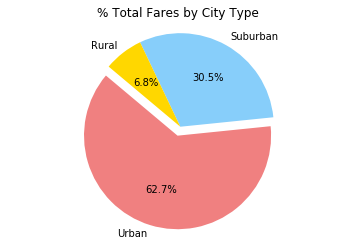

In [98]:
#URBAN
urban_sums=urban_values.groupby(["city"])["fare"].sum()
total_urban=urban_sums.sum()

#SUBURBAN
suburban_sums=suburban_values.groupby(["city"])["fare"].sum()
total_suburban=suburban_sums.sum()

#RURAL
rural_sums=rural_values.groupby(["city"])["fare"].sum()
total_rural=rural_sums.sum()

#Calculate type percents
total_sum=total_urban + total_suburban + total_rural
urban_percent_calc=[total_urban/total_sum]
suburban_percent_calc= [total_suburban/total_sum]
rural_percent_calc=[total_rural/total_sum]

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_percent_calc, suburban_percent_calc, rural_percent_calc]
colors = ["lightcoral", "lightskyblue", "gold"]
explode=(0.1,0,0)

plt.title("% Total Fares by City Type")


#Plot Pie Chart
plt.pie(sizes,explode= explode, labels=labels, colors=colors, autopct="%1.1f%%",startangle=140)
plt.axis("equal")

plt.show()

# # Save Figure


In [60]:
# Show Figure
plt.show()

## Total Rides by City Type

In [99]:
# Calculate Ride Percents
#URBAN
urban_ride_count=urban_values.groupby(["city"])["ride_id"].count()
total_urban_ride=urban_ride_count.sum()
#total_urban_ride= 16.25 

# #SUBURBAN
# suburban_sums=suburban_values.groupby(["city"])["fare"].sum()
# total_suburban=suburban_sums.sum()

# #RURAL
# rural_sums=rural_values.groupby(["city"])["fare"].sum()
# total_rural=rural_sums.sum()

# #Calculate type percents
# total_sum=total_urban + total_suburban + total_rural
# urban_percent_calc=[total_urban/total_sum]
# suburban_percent_calc= [total_suburban/total_sum]
# rural_percent_calc=[total_rural/total_sum]

# # Build Pie Chart
# labels = ["Urban", "Suburban", "Rural"]
# sizes = [urban_percent_calc, suburban_percent_calc, rural_percent_calc]
# colors = ["lightcoral", "lightskyblue", "gold"]
# explode=(0.1,0,0)

# plt.title("% Total Fares by City Type")


# #Plot Pie Chart
# plt.pie(sizes,explode= explode, labels=labels, colors=colors, autopct="%1.1f%%",startangle=140)
# plt.axis("equal")

# plt.show()

# # Build Pie Chart

# # Save Figure


1625

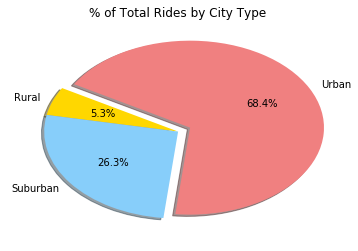

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


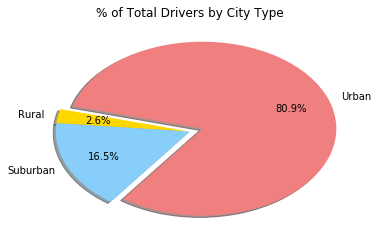

In [6]:
# Show Figure
plt.show()